In [1]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
data_train = '/content/gdrive/My Drive/emotion_recog/emo'

In [3]:
!pip install fastai --upgrade

     |████████████████████████████████| 358kB 8.7MB/s 
     |████████████████████████████████| 40kB 5.5MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [4]:
from fastai.vision.all import *
from fastai.vision import *
#from fastai.vision.core import *
from fastai.vision.data import *

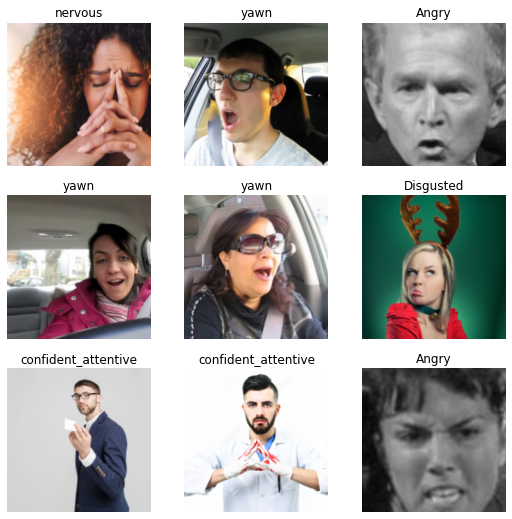

In [5]:
def label_func(fname):
    #label = str(fname).split(os.path.sep)[-2]
    return str(fname).split(os.path.sep)[-2]
    #return label
dblock = DataBlock(blocks= (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   item_tfms = Resize(224),
                   batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_train)
dls.show_batch()

In [11]:
learner = cnn_learner(dls,models.resnet152,metrics=accuracy)
learner.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,time
0,1.594340,1.069069,0.718605,00:36


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,accuracy,time
0,0.872290,0.742193,0.753488,00:47
1,0.658677,0.667699,0.793023,00:47
2,0.532819,0.790095,0.790698,00:47
3,0.441148,0.664766,0.816279,00:47
4,0.338341,0.672708,0.832558,00:47
5,0.241079,0.735292,0.834884,00:47
6,0.171646,0.698759,0.853488,00:47
7,0.125508,0.708668,0.846512,00:47
8,0.088908,0.690584,0.846512,00:47
9,0.066173,0.693353,0.848837,00:47


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

SuggestedLRs(lr_min=3.311311302240938e-05, lr_steep=1.0964781722577754e-06)

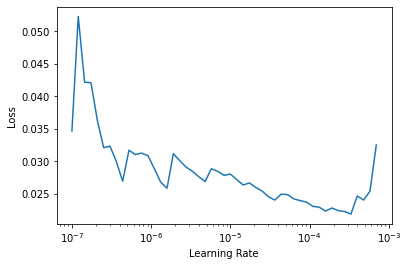

In [9]:
learner.lr_find()

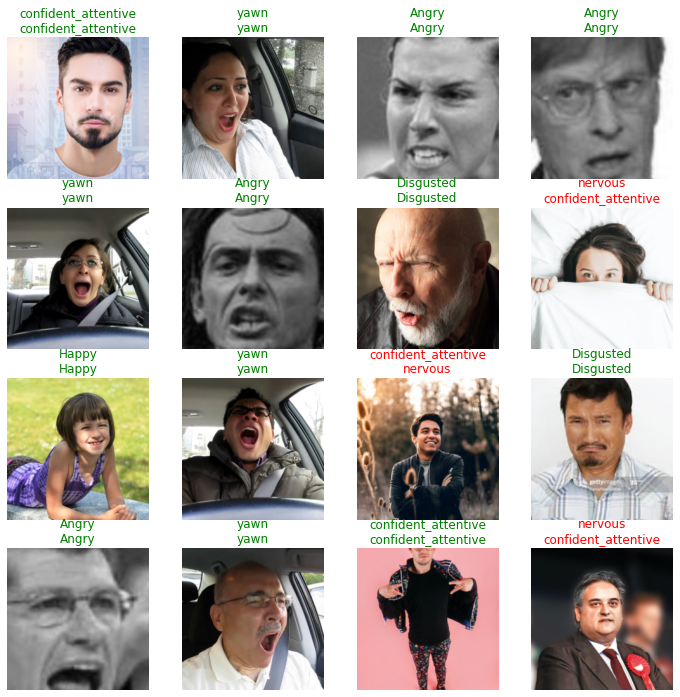

In [12]:

learner.show_results(max_n=16)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


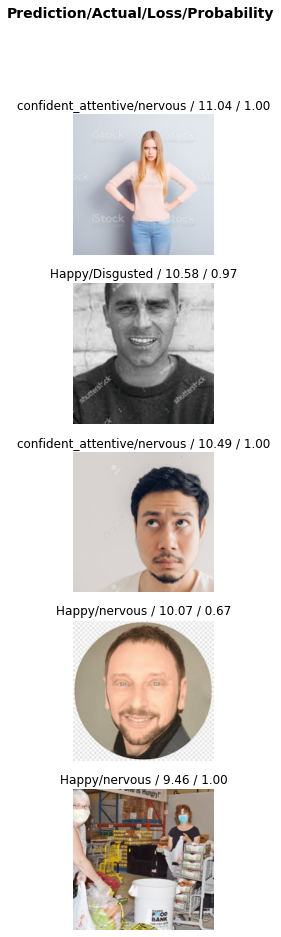

In [13]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_top_losses(5, nrows=5)

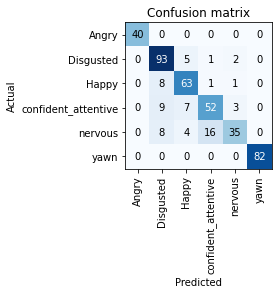

In [14]:
interp.plot_confusion_matrix()

In [15]:
learner.export('/content/gdrive/My Drive/emotion_recog/emo_fastai.pkl')

In [ ]:
# for loading model
 # use leaner = load_learner('/content/gdrive/My Drive/emotion_recog/emo_fastai.pkl')